In [100]:
 pip install smote_variants

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=ecaf4d9e9a00354b7b6504985ef0b6f837a6e5231a085b388314868e75b6380e
  Stored in directory: c:\users\melina cm\appdata\local\pip\cache\wheels\7e\47\6d\97ad48be13d8b0fc231b7df226a3d6645820c32559822a826c
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7452 sha256=770e7df33c9c8bdeb9bfe7cde7af042792c5ed39974347b8d193f7ab18f97614
  Stored in directory: c:\users\melina cm\appdata\local\pip\cache\wheels\26\3c\70\9467407f3aa90862061eadcd286627b23a8bab6789b667776f
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=995828c9cf2fdc571fea70a70286b94efecfabaaceb9b28272e0034043ccbfa7
  Stored in directory: c:\users\melina cm\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built minisom statistics termcolor
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


In [101]:
pip install imbalanced_databases

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=7cfba50e4080f6336d2ecd4f1a9aeaa54dd56422dce9c4241e8a449241211ab7
  Stored in directory: c:\users\melina cm\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

TRAIN

In [126]:
train = pd.read_csv('application_train.csv')
train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [129]:
print(train.keys())

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [130]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

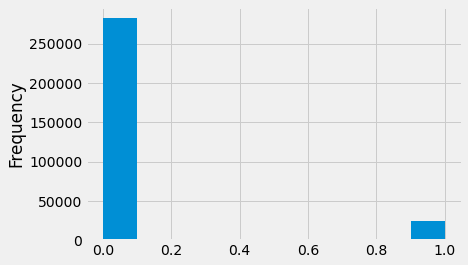

In [131]:
train['TARGET'].plot.hist()

In [132]:
train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

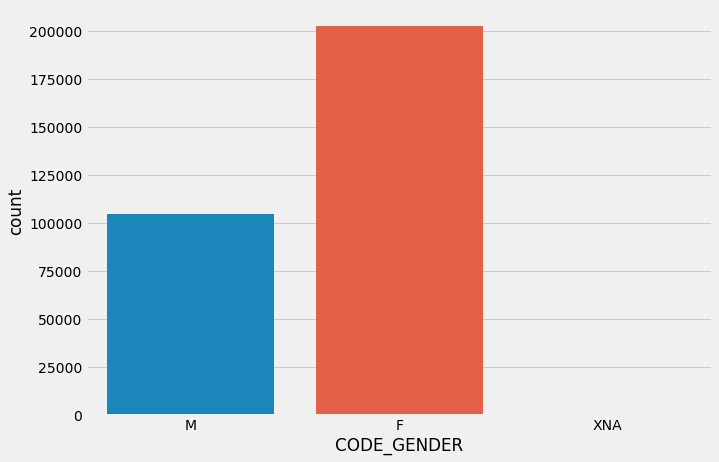

In [133]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=train)

Text(0.5, 0, 'Occupation Type')

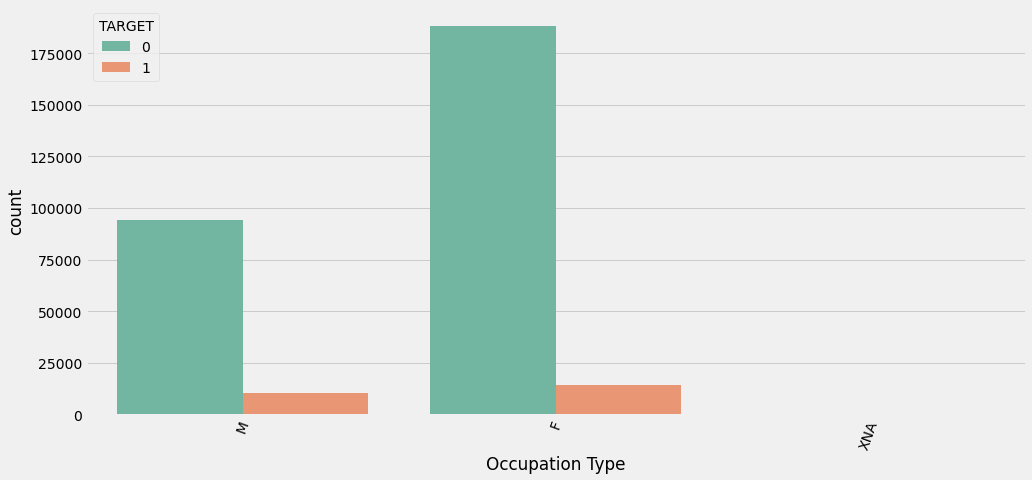

In [134]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='CODE_GENDER',hue='TARGET',data=train,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

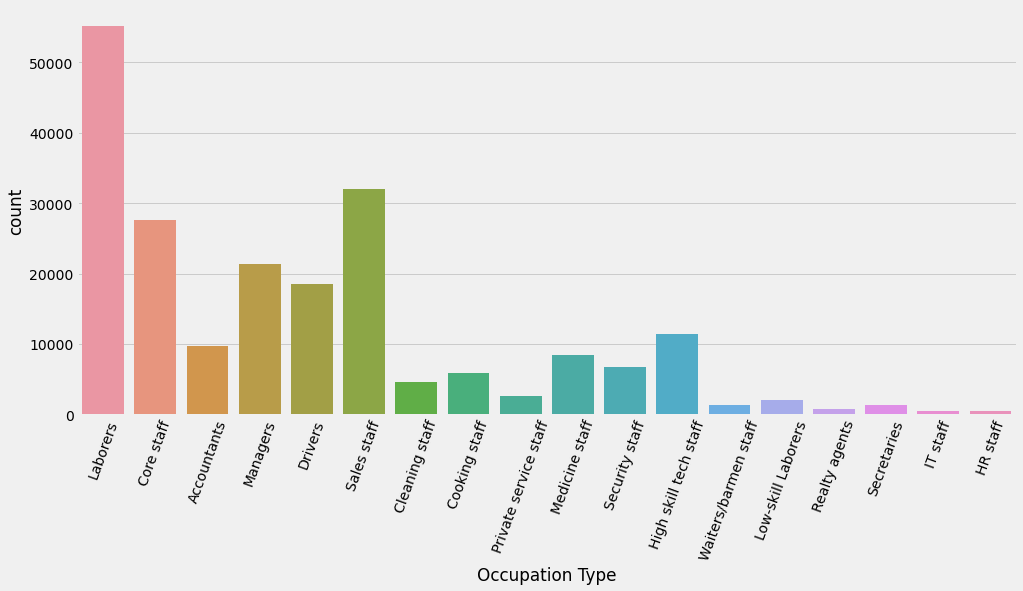

In [135]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',data=train)
plt.xlabel("Occupation Type")
plt.xticks(rotation=70)

Text(0.5, 0, 'Occupation Type')

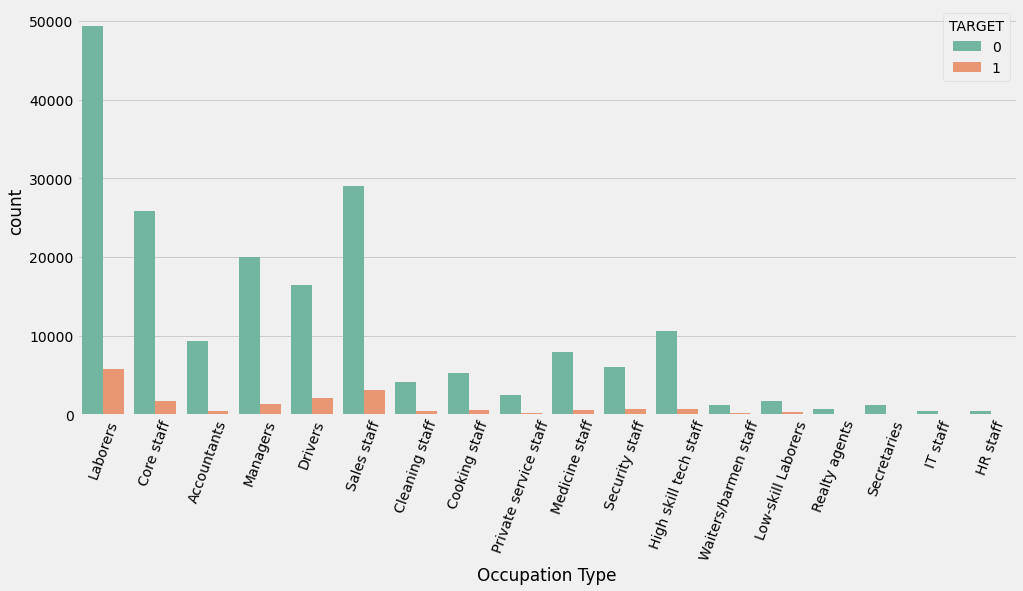

In [136]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET',data=train,palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")

Text(0, 0.5, 'Average Annual family income')

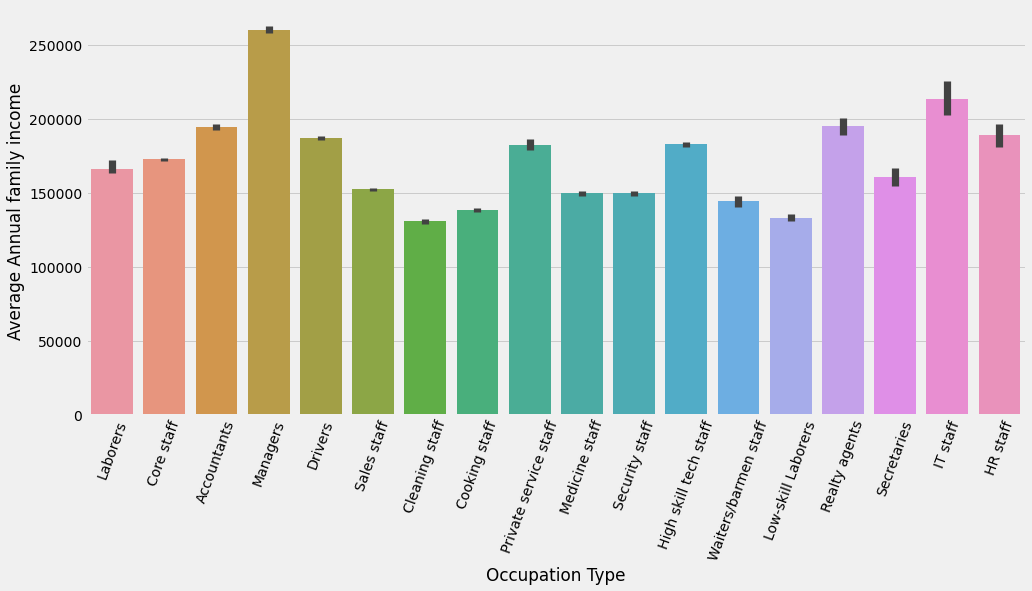

In [137]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',data=train)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

In [138]:
train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
train=train.fillna(train.mean())

In [ ]:
correlations=train.corr()['TARGET'].sort_values()
correlations

In [ ]:
correlations.head(15)

In [ ]:
correlations.tail(15)

Korelasi tertinggi atau diatas 0.05 adalah:
'- REG_CITY_NOT_WORK_CITY 
'- DAYS_ID_PUBLISH 
'- DAYS_LAST_PHONE_CHANGE
'- REGION_RATING_CLIENT 
'- REGION_RATING_CLIENT_W_CITY
'- DAYS_BIRTH 
'- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3

In [ ]:
train['DAYS_BIRTH'].head(5)

In [ ]:
train['REG_CITY_NOT_WORK_CITY'].tail(25)

In [ ]:
train['AGE'] = train['DAYS_BIRTH']/-365
train

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(train.loc[train['TARGET']==0,'AGE'],label='target==0')

sns.kdeplot(train.loc[train['TARGET']==1,'AGE'],label='target==1')

plt.xlabel('Age(years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==1, "AGE"].reset_index().groupby("AGE").size().plot(kind="hist", ax=ax1)
train.loc[train["TARGET"]==0, "AGE"].reset_index().groupby("AGE").size().plot(kind="hist", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
train.loc[train["TARGET"]==1, "REGION_RATING_CLIENT_W_CITY"].reset_index().groupby("REGION_RATING_CLIENT_W_CITY").size().plot(kind="pie", ax=ax1)
train.loc[train["TARGET"]==0, "REGION_RATING_CLIENT_W_CITY"].reset_index().groupby("REGION_RATING_CLIENT_W_CITY").size().plot(kind="pie", ax=ax2)

ax1.set_xlabel("target 1")
ax2.set_xlabel("target 0")

In [ ]:
train['NAME_EDUCATION_TYPE'].unique()

In [ ]:
train['CODE_GENDER'].unique()

In [ ]:

scale_mapper = {'Lower secondary' : 0, 'Secondary / secondary special' : 1, 
'Incomplete higher' : 2, 'Higher education' : 3, 'Academic degree' : 4}

train['NAME_EDUCATION_TYPE'] = train['NAME_EDUCATION_TYPE'].replace(scale_mapper)
train['NAME_EDUCATION_TYPE'].unique()

In [ ]:
train = pd.concat([train, CODE_GENDER_dummies, NAME_INCOME_TYPE_dummies], axis=1)


train = train.drop(['CODE_GENDER','NAME_INCOME_TYPE'], axis=1)

In [121]:
train['NAME_INCOME_TYPE'].unique()

In [122]:
CODE_GENDER_dummies = pd.get_dummies(train['CODE_GENDER'],prefix='CODE_GENDER')
NAME_INCOME_TYPE_dummies = pd.get_dummies(train['NAME_INCOME_TYPE'],prefix='NAME_INCOME_TYPE')

KeyError: 'CODE_GENDER'

In [117]:
y = train.iloc[:, 0].values
x = train.iloc[:, 1:23].values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [118]:
smote = SMOTE()

In [106]:
x_smote, y_smote = smote.fit_resample(x, y)

In [112]:
sc = StandardScaler()
x_smote = sc.fit_transform(x_smote)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = .3, random_state = 10)

ValueError: could not convert string to float: 'Cash loans'

In [109]:
classifier =  LogisticRegression(max_iter=3000)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

NameError: name 'StandardScaler' is not defined

In [110]:
log_accuracy=accuracy_score(y_test, y_pred)
log_recall=recall_score(y_test,y_pred)
log_precision=precision_score(y_test,y_pred)
log_rocauc=roc_auc_score(y_test,y_pred)

NameError: name 'train_test_split' is not defined

In [91]:
predictions = classifier.predict_proba(x_test)
predictions

NameError: name 'LogisticRegression' is not defined

In [ ]:
df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(x_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

df=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
df.sort_values(by=['prob_0'],  ascending=[False],inplace=True)

In [ ]:
df

In [ ]:
df